In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Hypothesis Generation
 
1. Do video with more views get more likes?
2. Do video with more comments get more likes?
3. Do with video with more dislikes gets more likes?
4. Do longer videos gets more like than shorter videos?
5. Do descriptive videos get more likes?
6. Does channel affect the number of likes?
7. Does the country of origin affects the likes?
8. Do people post more videos on weekends than weekdays?

In [2]:
import warnings
warnings.filterwarnings("ignore")

## EDA

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Lets go and explore our training and test datasets. We will do the following steps:

1. Brief Look at the Dataset<br>
2. See the dataset shape.<br>
3. Target Distribution.<br>
4. See the variables datatypes.<br>
5. See the number of missing/null values.<br>
6. See the number of unique values in each variable.<br>

In [4]:
train.head(3)

video_id                                              title  \
0     53364  Alif Allah Aur Insaan Episode 34 HUM TV Drama ...   
1     51040  It's Showtime Miss Q & A: Bela gets jealous of...   
2      1856  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n  ಕ್...   

           channel_title  category_id publish_date  \
0                 HUM TV         24.0   2017-12-12   
1  ABS-CBN Entertainment         24.0   2018-03-08   
2     SANDALWOOD REVIEWS         24.0   2018-03-26   

                                                tags     views  dislikes  \
0  HUM|"TV"|"Alif Allah Aur Insaan"|"Episode 34"|...  351430.0     298.0   
1  ABS-CBN Entertainment|"ABS-CBN"|"ABS-CBN Onlin...  461508.0      74.0   
2  challenging star darshan latest news|"challeng...   40205.0     150.0   

   comment_count                                        description  \
0          900.0  Alif Allah Aur Insaan Episode 34 Full - 12 Dec...   
1          314.0  Vice Ganda notices Bela Padilla's sudden chang...   
2          100.0  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ    ಕ್ಲ...   

  country_code   likes  
0           CA  2351.0  
1           CA  3264.0  
2           IN   580.0

In [5]:
test.head(3)

video_id                                              title  \
0     87185  జనవరి 31 గ్రహణం రోజు కొడుకులు ఉన్నవాళ్లు ఏం చే...   
1      9431  ठाणे:'जेव्हा सत्ता बदलेल तेव्हा केस तुमच्यावरह...   
2     40599                           Thank you, Rider Nation!   

              channel_title  category_id publish_date  \
0     CHIRRAVURI FOUNDATION         22.0   2018-01-17   
1           VIRAL IN  INDIA         22.0   2017-11-18   
2  Saskatchewan Roughriders         17.0   2017-12-01   

                                                tags     views  dislikes  \
0  Chirravuri|"Foundation"|"chirravuri foundation...   80793.0      54.0   
1  Raj Thackeray|"LIVE SPEECH"|"latest Speech"|"r...  150317.0     230.0   
2  Roughriders|"Riders"|"CFL"|"Regina"|"Saskatche...    6558.0      10.0   

   comment_count                                        description  \
0           79.0  8885569579...CHIRRAVURI FOUNDATION.\n\n☛Subsct...   
1          311.0  Don't Forget to SUBSCIRBE to our YouTube Chann...   
2            7.0  “To the devoted, the impassioned, the loyal:\n...   

  country_code  
0           IN  
1           IN  
2           CA

In [6]:
print(f"Shape of train set : {train.shape}")
print(f"Shape of test set : {test.shape}")

Shape of train set : (26061, 12)
Shape of test set : (11170, 11)


In [7]:
ID_COL,target = "video_id","likes"

In [8]:
features = [c for c in train.columns if c not in [ID_COL,target]]
print(len(features))

10


Target Distribution

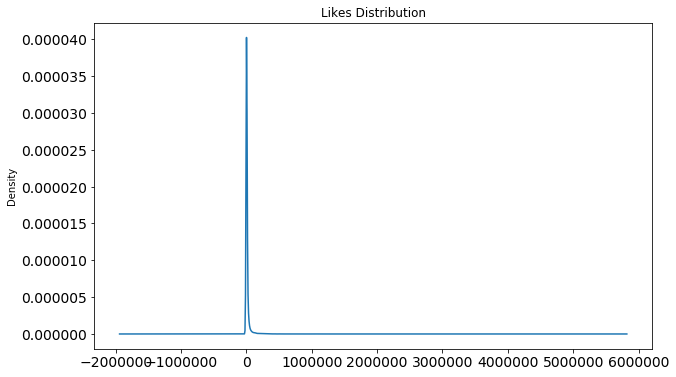

In [9]:
_ = train[target].plot(kind="density",title="Likes Distribution",fontsize=14,figsize=(10,6))

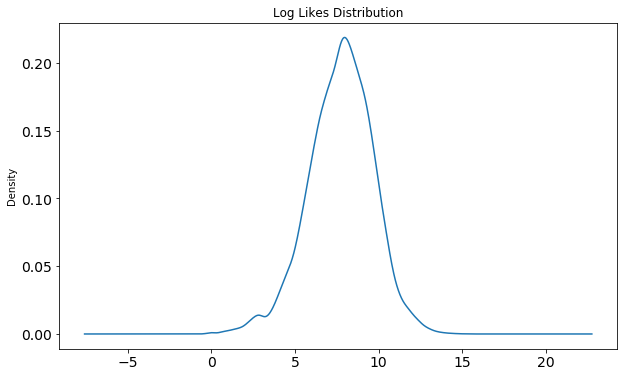

In [10]:
_ = pd.Series(np.log1p(train[target])).plot(kind="density",title="Log Likes Distribution",fontsize=14,figsize=(10,6))

Boxplot on both without log and with log transformation

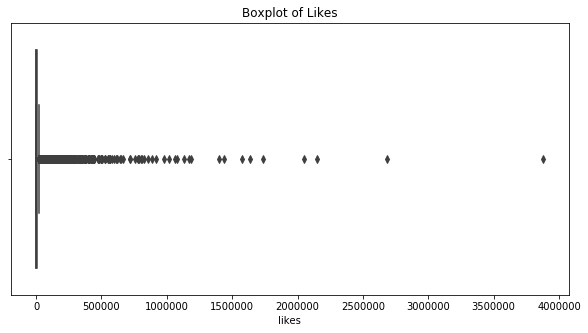

In [11]:
plt.figure(figsize = (10,5))
plt.title("Boxplot of Likes")
sns.boxplot(x="likes",data=train)

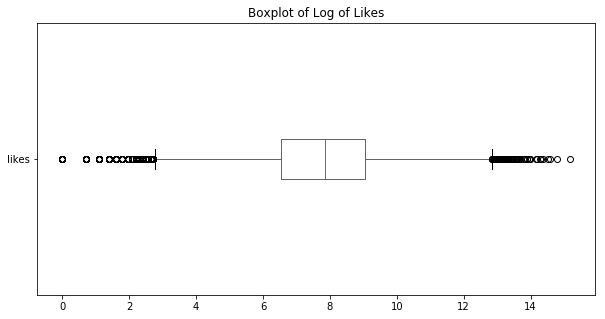

In [12]:
_ = pd.Series(np.log1p(train[target])).plot(kind = "box",vert=False,title="Boxplot of Log of Likes",figsize=(10,5))

Variable Datatypes

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 12 columns):
video_id         26061 non-null int64
title            26061 non-null object
channel_title    26061 non-null object
category_id      26061 non-null float64
publish_date     26061 non-null object
tags             26061 non-null object
views            26061 non-null float64
dislikes         26061 non-null float64
comment_count    26061 non-null float64
description      26061 non-null object
country_code     26061 non-null object
likes            26061 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.4+ MB


In [14]:
train.isnull().sum()

video_id         0
title            0
channel_title    0
category_id      0
publish_date     0
tags             0
views            0
dislikes         0
comment_count    0
description      0
country_code     0
likes            0
dtype: int64

In [15]:
train.nunique()

video_id         26061
title            26005
channel_title     5764
category_id         17
publish_date       348
tags             21462
views            25338
dislikes          2633
comment_count     4993
description      23426
country_code         4
likes            12134
dtype: int64

## Analyzing each of the variables 

1. Numerical Variable
2. Categorical Variable
3. Textual Variable
4. Data/time Variable

Also our target is continous for which we'll perform two type on analysis:
1. Univariate Analysis
2. Bivariate Analysis with targert variable

In [16]:
train.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes'],
      dtype='object')

In [17]:
num_cols = ["views","dislikes","comment_count"]

Boxplot for each variable in univariate analysis

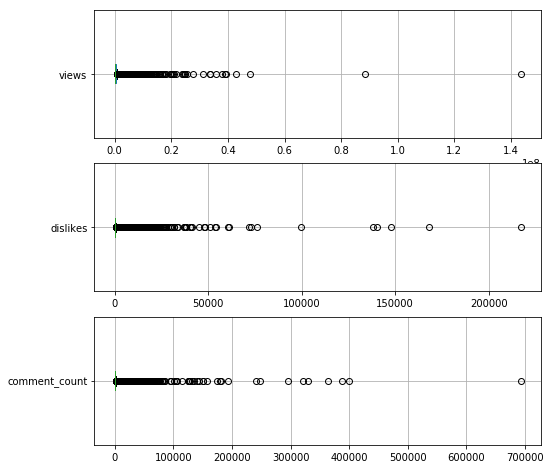

In [18]:
fig,axes = plt.subplots(3,1,figsize=(8,8))
for i,c in enumerate(num_cols):
    _ = train[[c]].boxplot(ax =axes[i],vert=False)

Distribution Plot

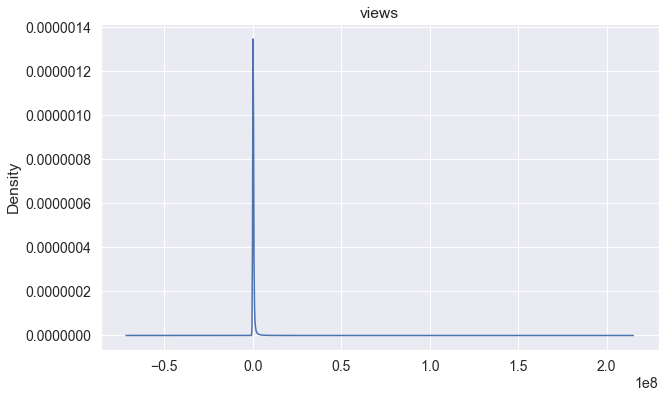

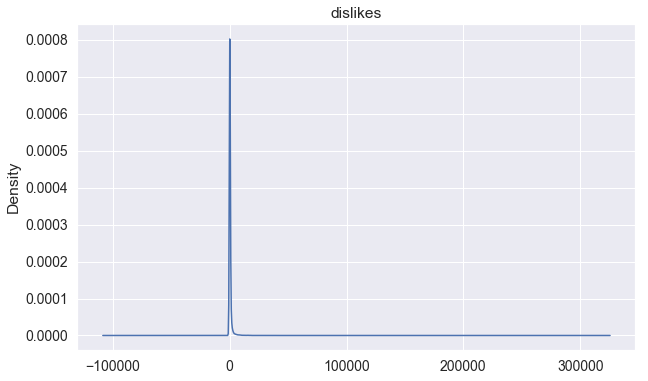

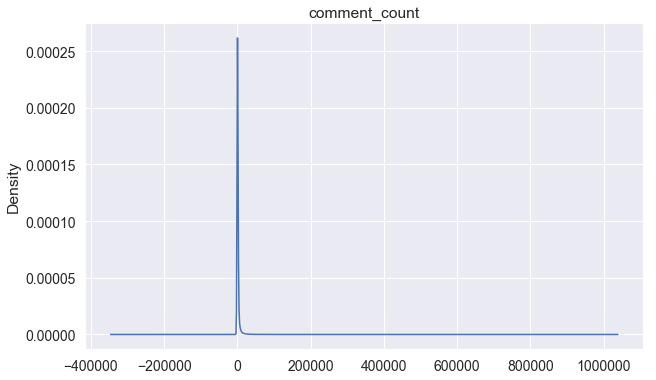

In [19]:
sns.set(font_scale=1.3)


for i, c in enumerate(num_cols):
    _ = train[c].plot(kind="density",title=c,fontsize=14,figsize=(10,6))
    plt.show()

Transform numerical columns so that data becomes numerically distributed

In [20]:
for i in num_cols+["likes"]:
    train[i]=np.log1p(train[i])

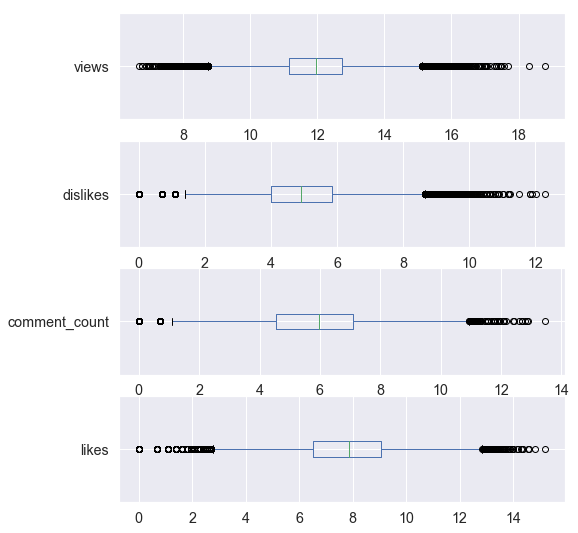

In [21]:
fig, axes = plt.subplots(4, 1, figsize=(8, 9))
for i, c in enumerate(num_cols + ['likes']):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

Density plots

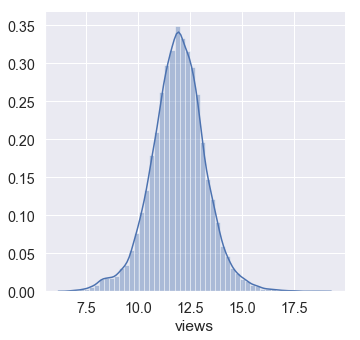

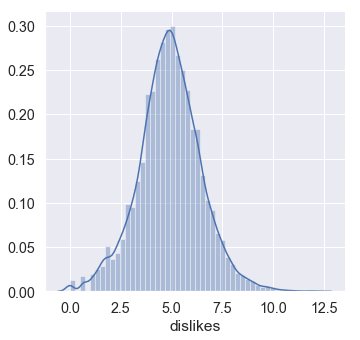

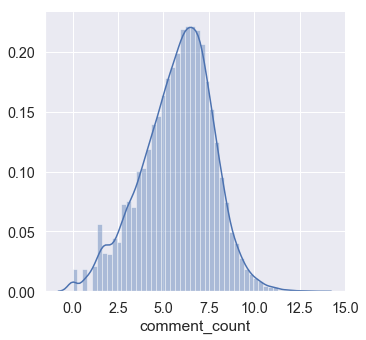

In [44]:
sns.set(font_scale=1.3)
for i, c in enumerate(num_cols):
    #_ = train[c].plot(kind="density",title=c,fontsize=14,figsize=(8,6))
    #plt.show()
    sns.FacetGrid(train,size=5).map(sns.distplot,c).add_legend()

Bivariate Analysis

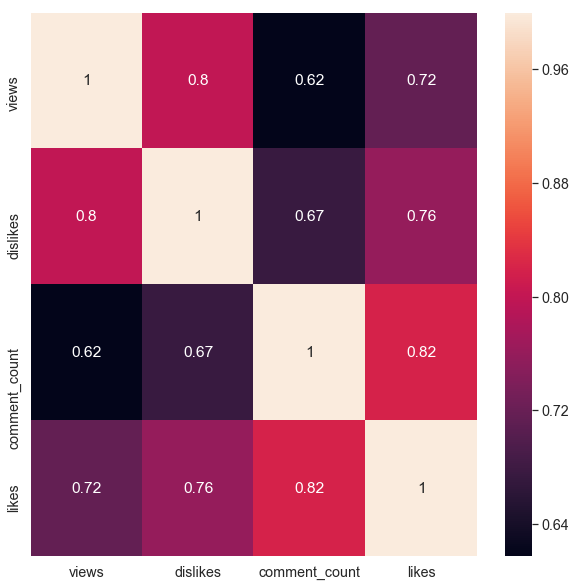

In [23]:
plt.figure(figsize=(10,10))
_ = sns.heatmap(train[num_cols+["likes"]].corr(),annot = True)

<Figure size 576x576 with 0 Axes>

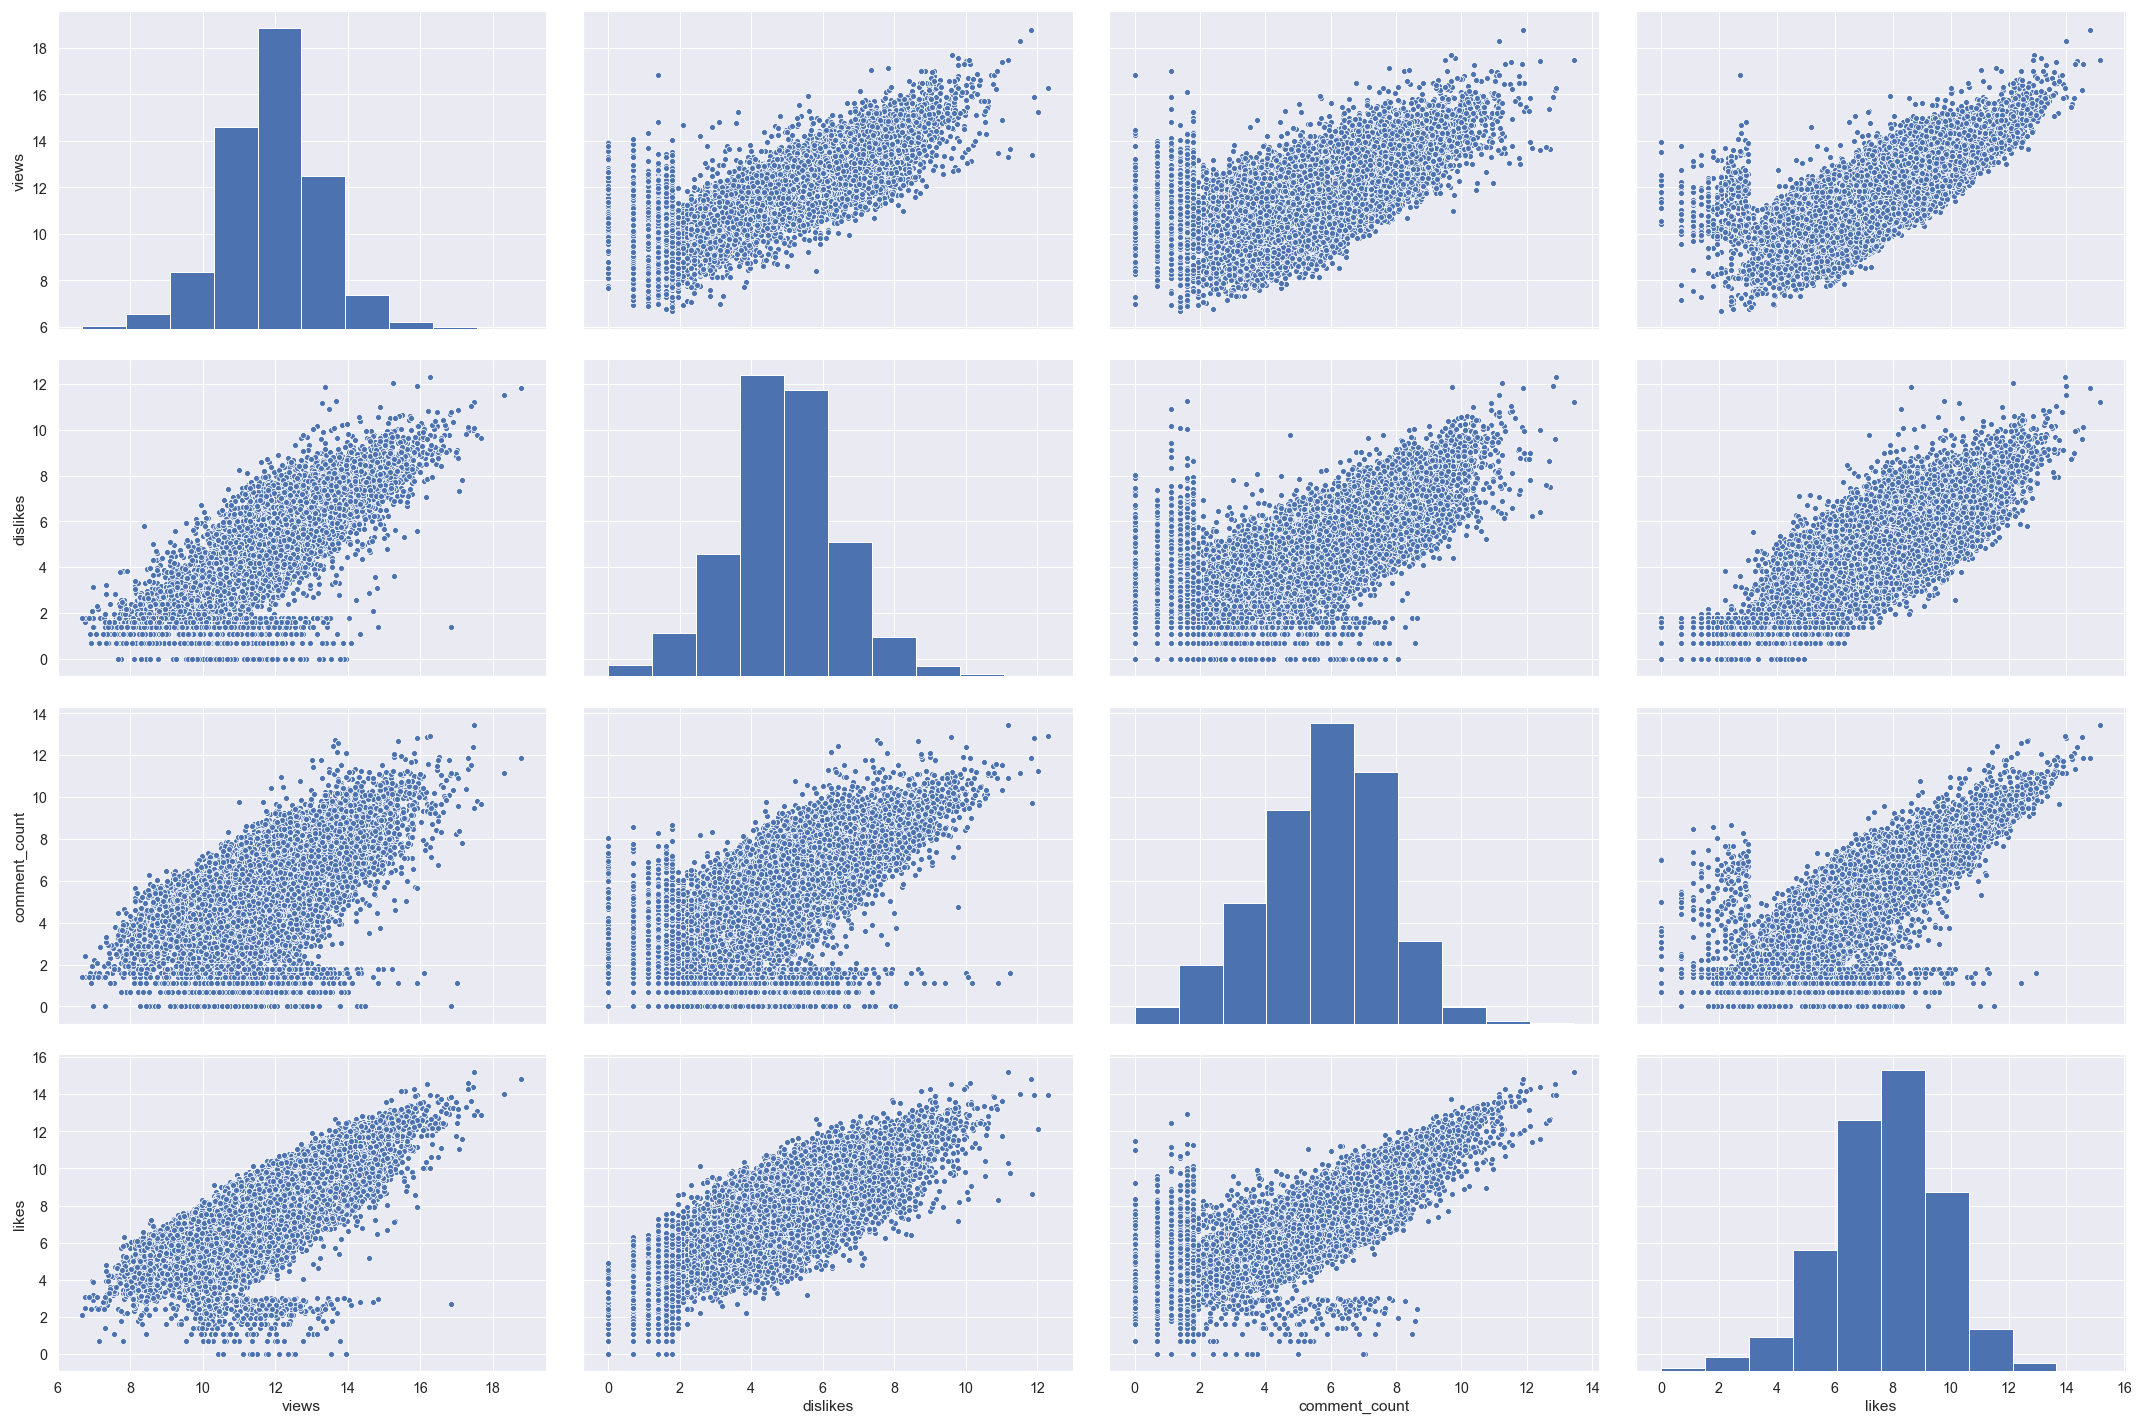

In [24]:
plt.figure(figsize=(8,8))
_ = sns.pairplot(train[num_cols+["likes"]],height = 5,aspect=24/16)

Answering hypothesis

Do videos with more views get more likes ?<br>
Yes they do, we have a high correlation of 0.72 also the plot between the two variables shows this.

Do videos with more comments get more likes ?<br>
Yes they do, we have a high correlation of 0.82 also the plot between the two variables shows this.

Do videos with more dislikes get less likes ?<br>
Any form of popularity is good popularity. As the number dislikes increases, number of views increases too, and so the number of likes.

Do longer videos get more likes than shorter videos ?<br>
We don't have data to answer this question. Should we try to collect more data ? What other features could be helpful ?

### Categorical Variables 

Univariate Analysis

Pie Charts

In [25]:
train.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes'],
      dtype='object')

In [26]:
cat_cols = ["channel_title","category_id","country_code"]

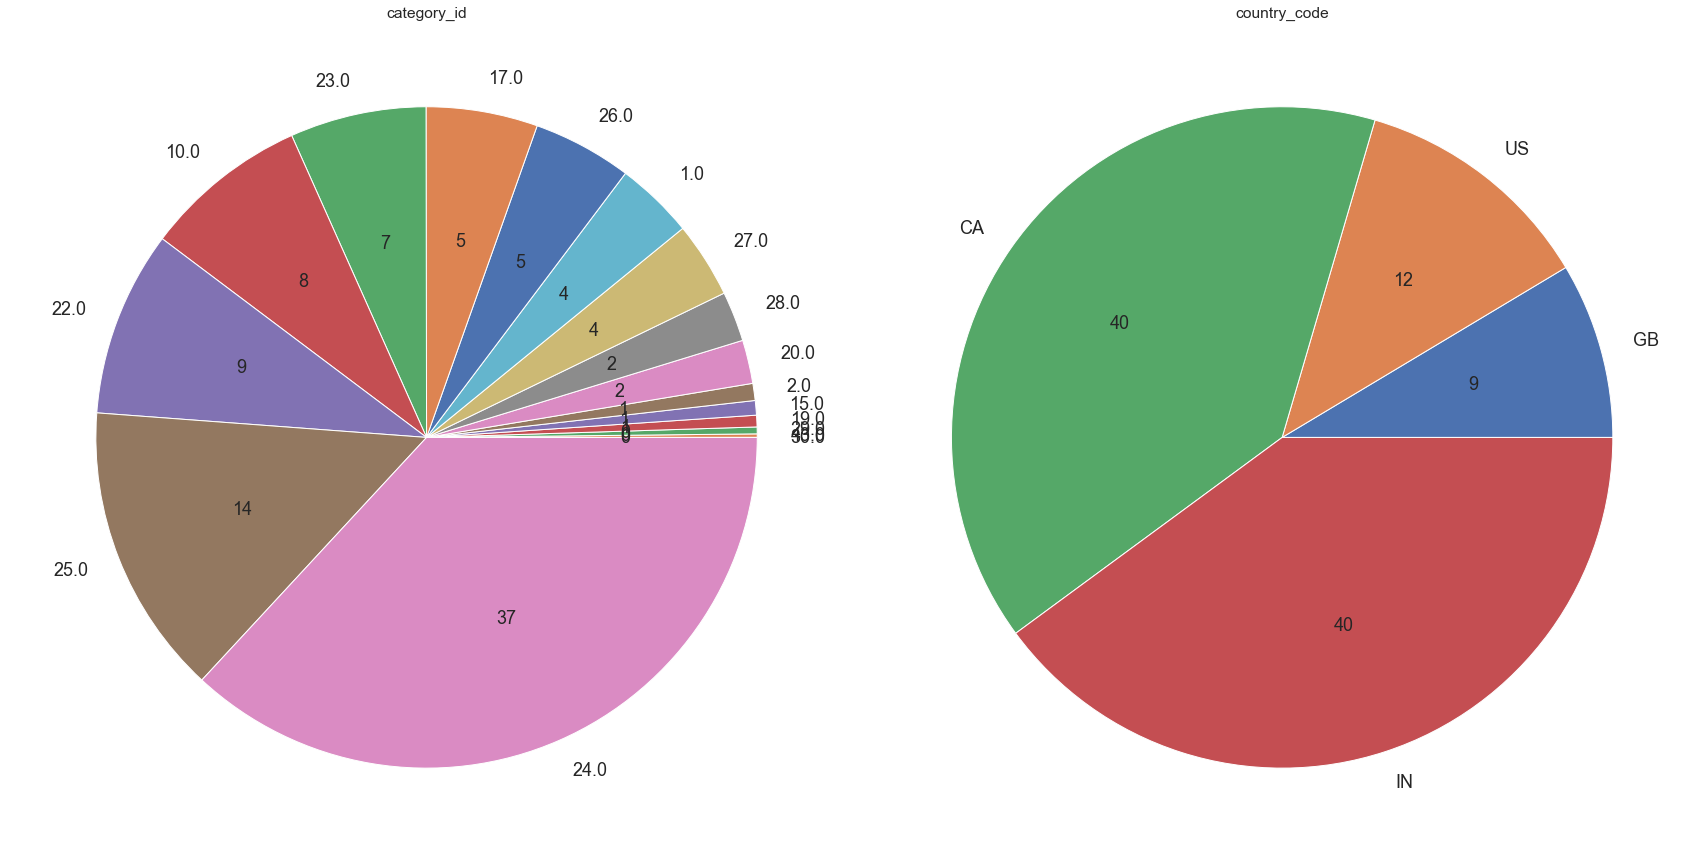

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(24, 20))

for i,c in enumerate(["category_id","country_code"]):
    _ = train[c].value_counts()[::-1].plot(kind="pie",ax=axes[i],title=c,autopct="%0.f",fontsize=18)
    _ = axes[i].set_ylabel('')
_ = plt.tight_layout()

Bar Plots

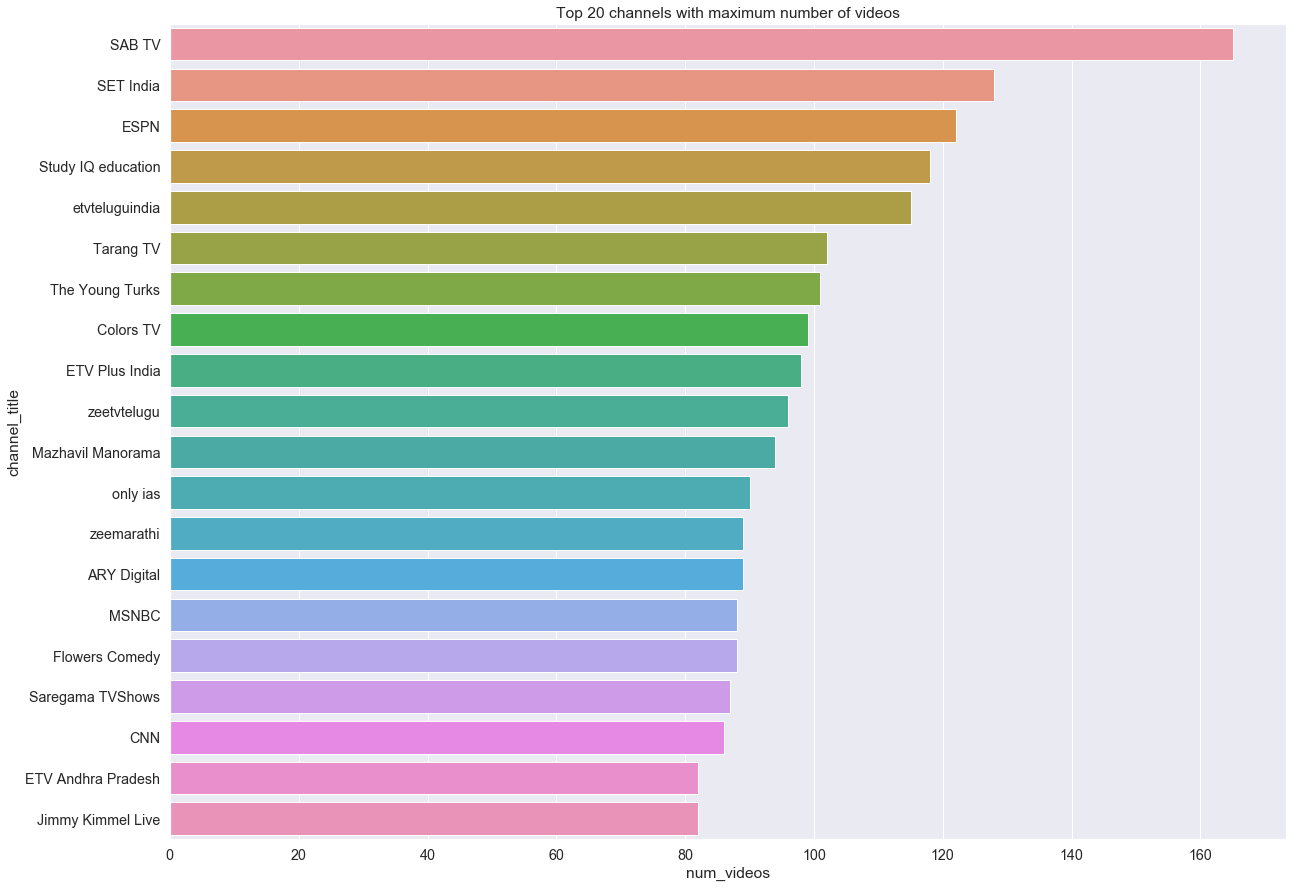

In [28]:
plt.figure(figsize=(20,15))
top_20_channels = train["channel_title"].value_counts()[:20].reset_index()
top_20_channels.columns = ["channel_title","num_videos"]

_ = sns.barplot(data = top_20_channels,x="num_videos",y="channel_title")
_ = plt.title("Top 20 channels with maximum number of videos")

Bivariate Analysis

Country wise number of videos on a channel

In [29]:
country_wise_channel = train.groupby(["country_code","channel_title"]).size().reset_index()
country_wise_channel.columns = ["country_code","channel_title","num_videos"]
country_wise_channel = country_wise_channel.sort_values(by = "num_videos",ascending=False)

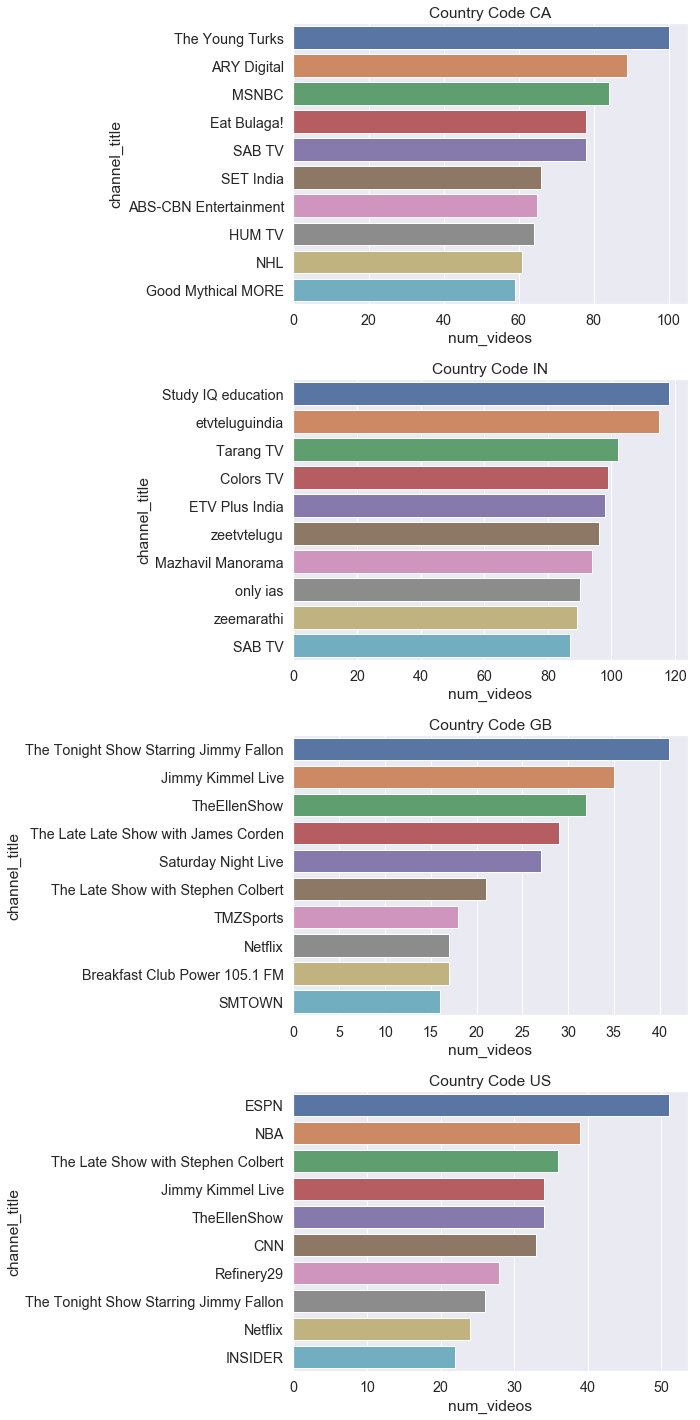

In [30]:
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

for i, c in enumerate(train['country_code'].unique()):
  country = country_wise_channel[country_wise_channel['country_code'] == c][:10]
  _ = sns.barplot(x = 'num_videos', y = 'channel_title', data = country, ax = axes[i])
  _ = axes[i].set_title(f'Country Code {c}')

plt.tight_layout()

Multivariate Analysis

In [31]:
country_wise_channels = train.groupby(['country_code', 'channel_title'])['likes'].max().reset_index()
country_wise_channels = country_wise_channels.sort_values(by = ['likes'], ascending=False)

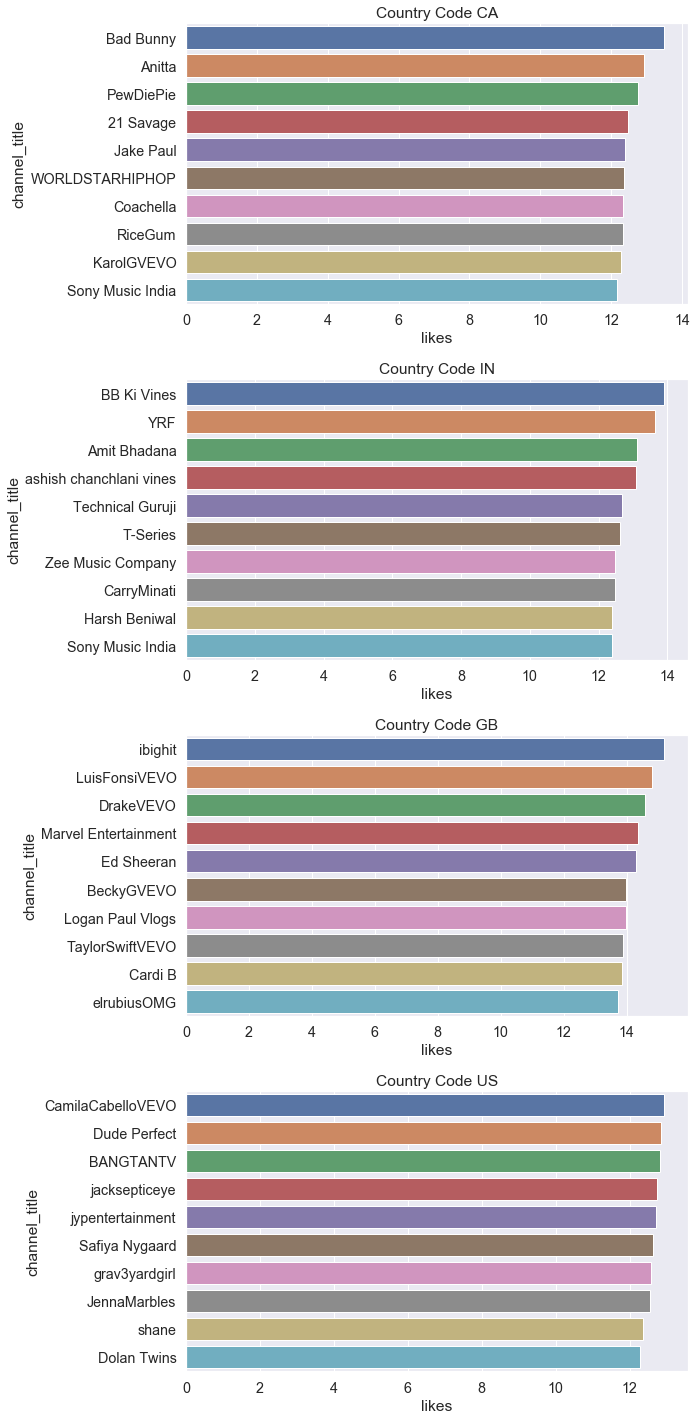

In [32]:
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

for i, c in enumerate(train['country_code'].unique()):
  country = country_wise_channels[country_wise_channels['country_code'] == c][:10]
  _ = sns.barplot(x = 'likes', y = 'channel_title', data = country, ax = axes[i])
  _ = axes[i].set_title(f'Country Code {c}')

plt.tight_layout()

CATPLOTS

Likes distribution per category

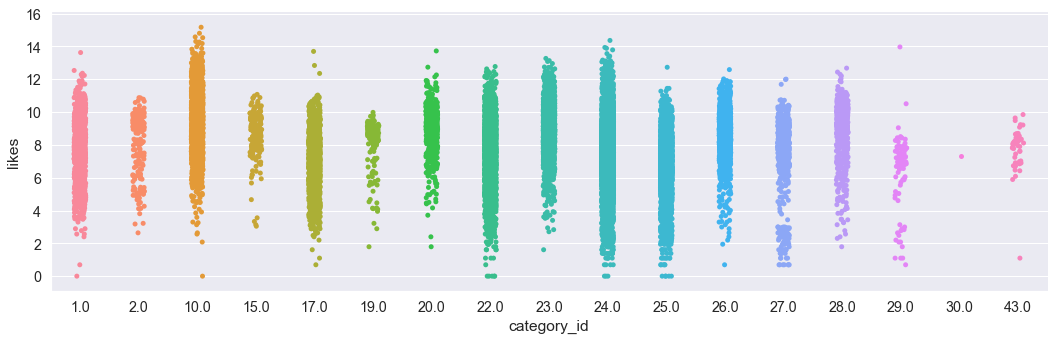

In [33]:
_ = sns.catplot(x="category_id",y="likes",data=train,height = 5,aspect = 24/8)

Text(0.5, 1.0, 'Likes ditribution per country')

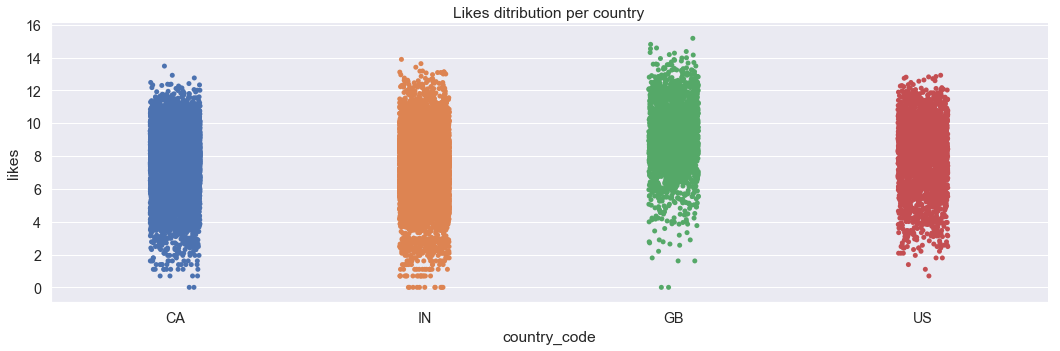

In [34]:
_ = sns.catplot(x="country_code", y="likes", data=train, height=5, aspect=24/8)
plt.title("Likes ditribution per country")

Mean likes per country

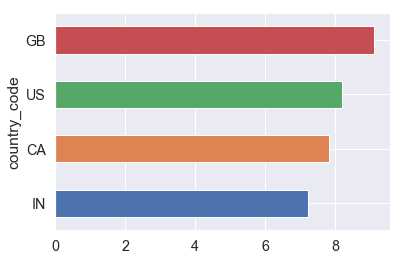

In [35]:
_ = train.groupby('country_code')['likes'].mean().sort_values().plot(kind = 'barh')

Question

Does a country affect the number of likes?<br>
Looks like videos posted in England have an higher average number of likes compared to videos posted in India.

## Date time variables

In [36]:
train["publish_date"] = pd.to_datetime(train["publish_date"],format="%Y-%m-%d")
test['publish_date'] = pd.to_datetime(test['publish_date'], format='%Y-%m-%d')
train["publish_date"].head()

0   2017-12-12
1   2018-03-08
2   2018-03-26
3   2018-02-21
4   2018-05-10
Name: publish_date, dtype: datetime64[ns]

Value Count of videos year wise

Maximum and minimum date

In [37]:
train["publish_date"].min(),train["publish_date"].max()

(Timestamp('2006-07-23 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In [38]:
train['publish_date'].dt.year.value_counts()

2018    18841
2017     7132
2015       16
2016       16
2011       13
2014        9
2013        9
2009        8
2012        6
2010        4
2008        3
2007        3
2006        1
Name: publish_date, dtype: int64

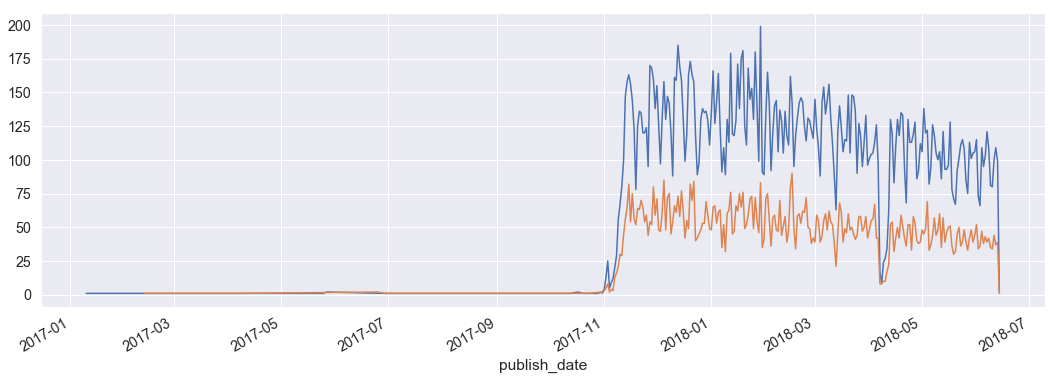

In [39]:
latest_data_train = train[train["publish_date"]>"2017"]
latest_data_test = test[test["publish_date"]>"2017"]
_ = latest_data_train.sort_values(by = 'publish_date').groupby('publish_date').size().plot(figsize=(18, 6))
_ = latest_data_test.sort_values(by = 'publish_date').groupby('publish_date').size().plot(figsize=(18, 6))

In [40]:
test.shape, train.shape

((11170, 11), (26061, 12))

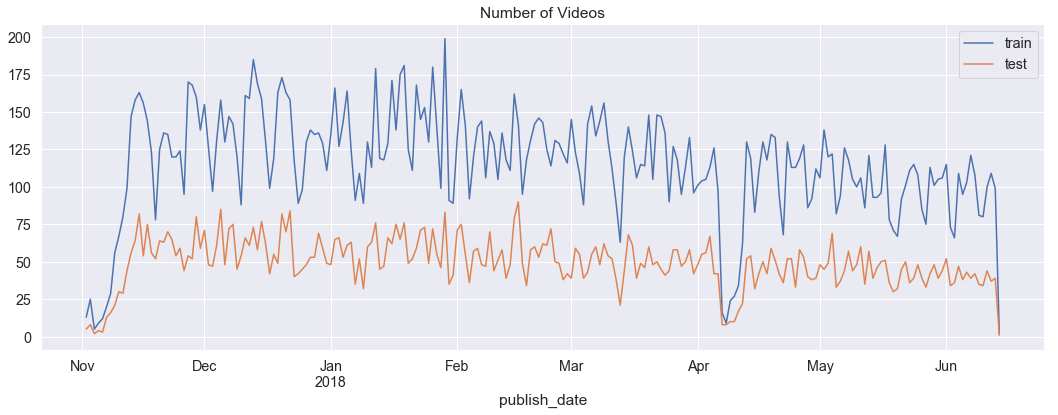

In [41]:
latest_data_train = train[train['publish_date'] > '2017-11']
latest_data_test = test[test['publish_date'] > '2017-11']
_ = latest_data_train.sort_values(by = 'publish_date').groupby('publish_date').size().rename('train').plot(figsize=(18, 6), title = 'Number of Videos')
_ = latest_data_test.sort_values(by = 'publish_date').groupby('publish_date').size().rename('test').plot(figsize=(18, 6), title = 'Number of Videos')
_ = plt.legend()

Mean likes in data sorted by date

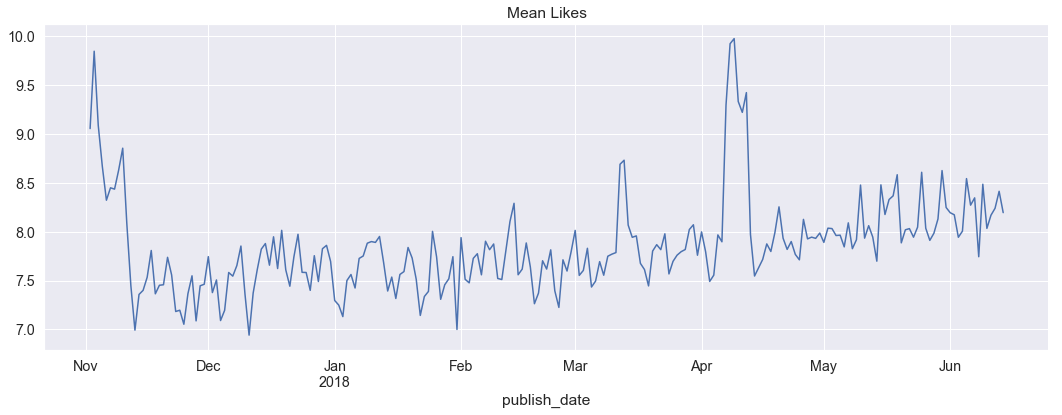

In [45]:
latest_data = train[train["publish_date"]>"2017-11"]
_=latest_data.sort_values(by="publish_date").groupby("publish_date")["likes"].mean().plot(figsize=(18,6),title="Mean Likes")

Number Of videos by country

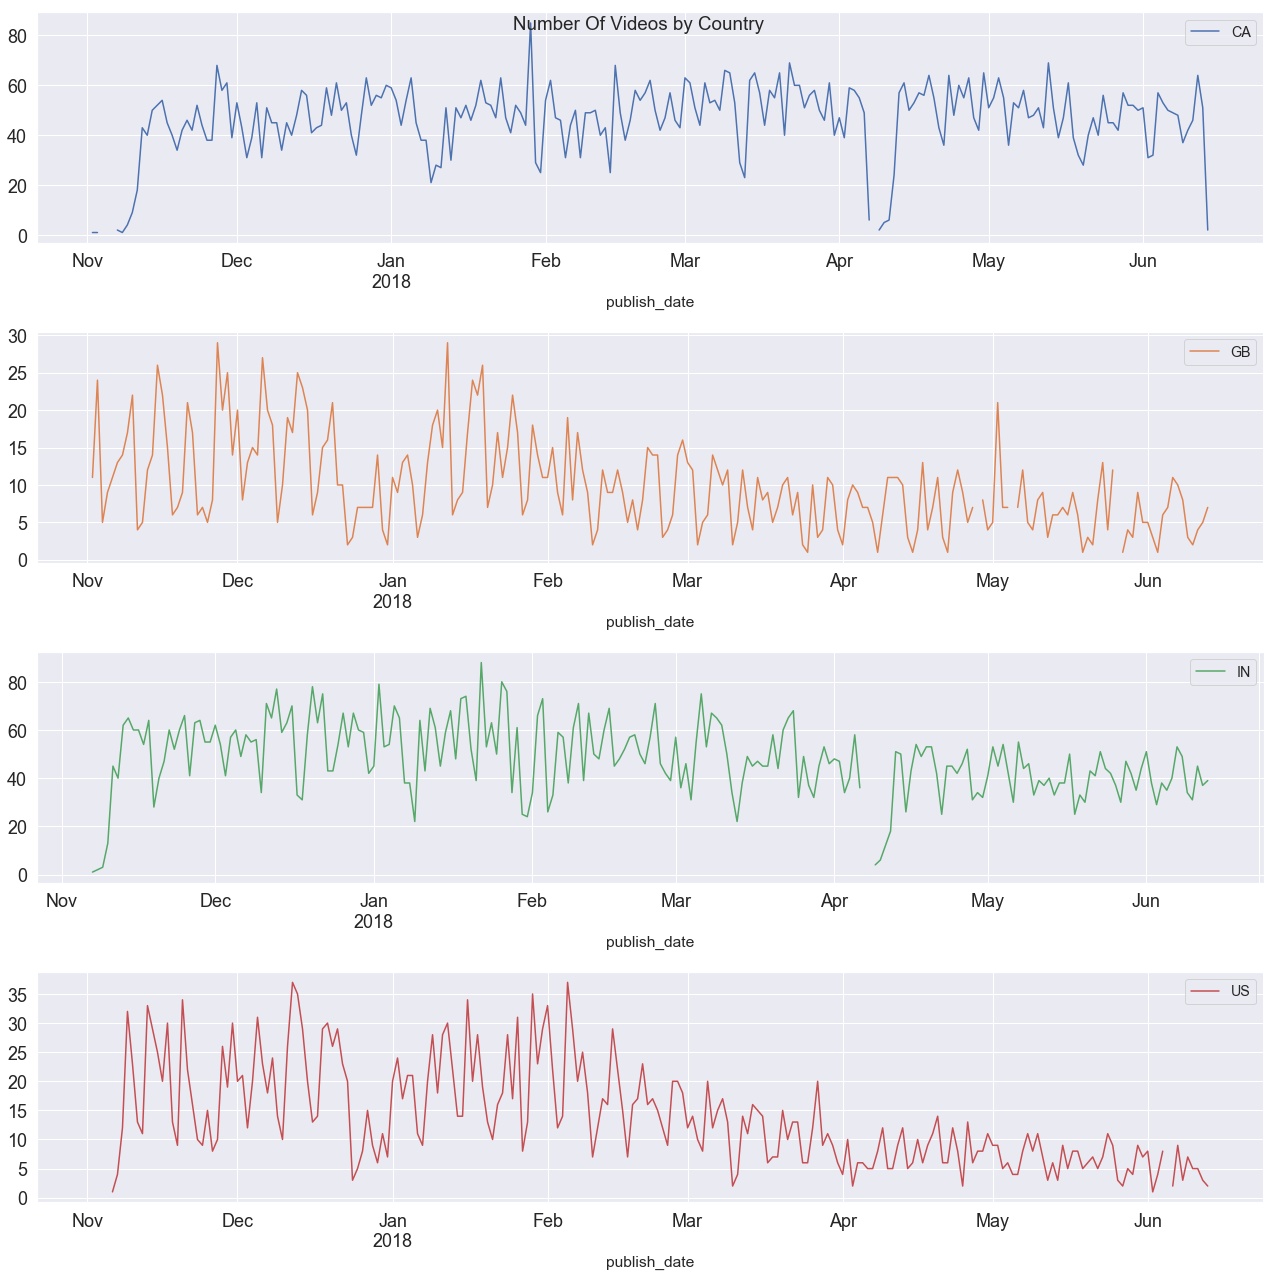

In [51]:
tmp = latest_data.groupby(["publish_date","country_code"]).size().reset_index()
_ = tmp.pivot_table(index="publish_date",columns="country_code",values=0).plot(subplots=True,figsize=(18,18),
                                                                              title="Number Of Videos by Country",
                                                                              sharex = False,fontsize=18)
plt.tight_layout()

In [48]:
tmp.head()

publish_date country_code   0
0   2017-11-02           CA   1
1   2017-11-02           GB  11
2   2017-11-02           US   1
3   2017-11-03           CA   1
4   2017-11-03           GB  24

In [50]:
tmp.pivot_table(index="publish_date",columns="country_code",values=0).head()

country_code   CA    GB  IN   US
publish_date                    
2017-11-02    1.0  11.0 NaN  1.0
2017-11-03    1.0  24.0 NaN  NaN
2017-11-04    NaN   5.0 NaN  NaN
2017-11-05    NaN   9.0 NaN  NaN
2017-11-06    NaN  11.0 NaN  1.0

Why could be the reason for drop in Number of Videos for GB and USA ?

Mean number of likes by country sorted by Date

In [53]:
tmp = latest_data.groupby(["publish_date","country_code"])['likes'].mean().reset_index()

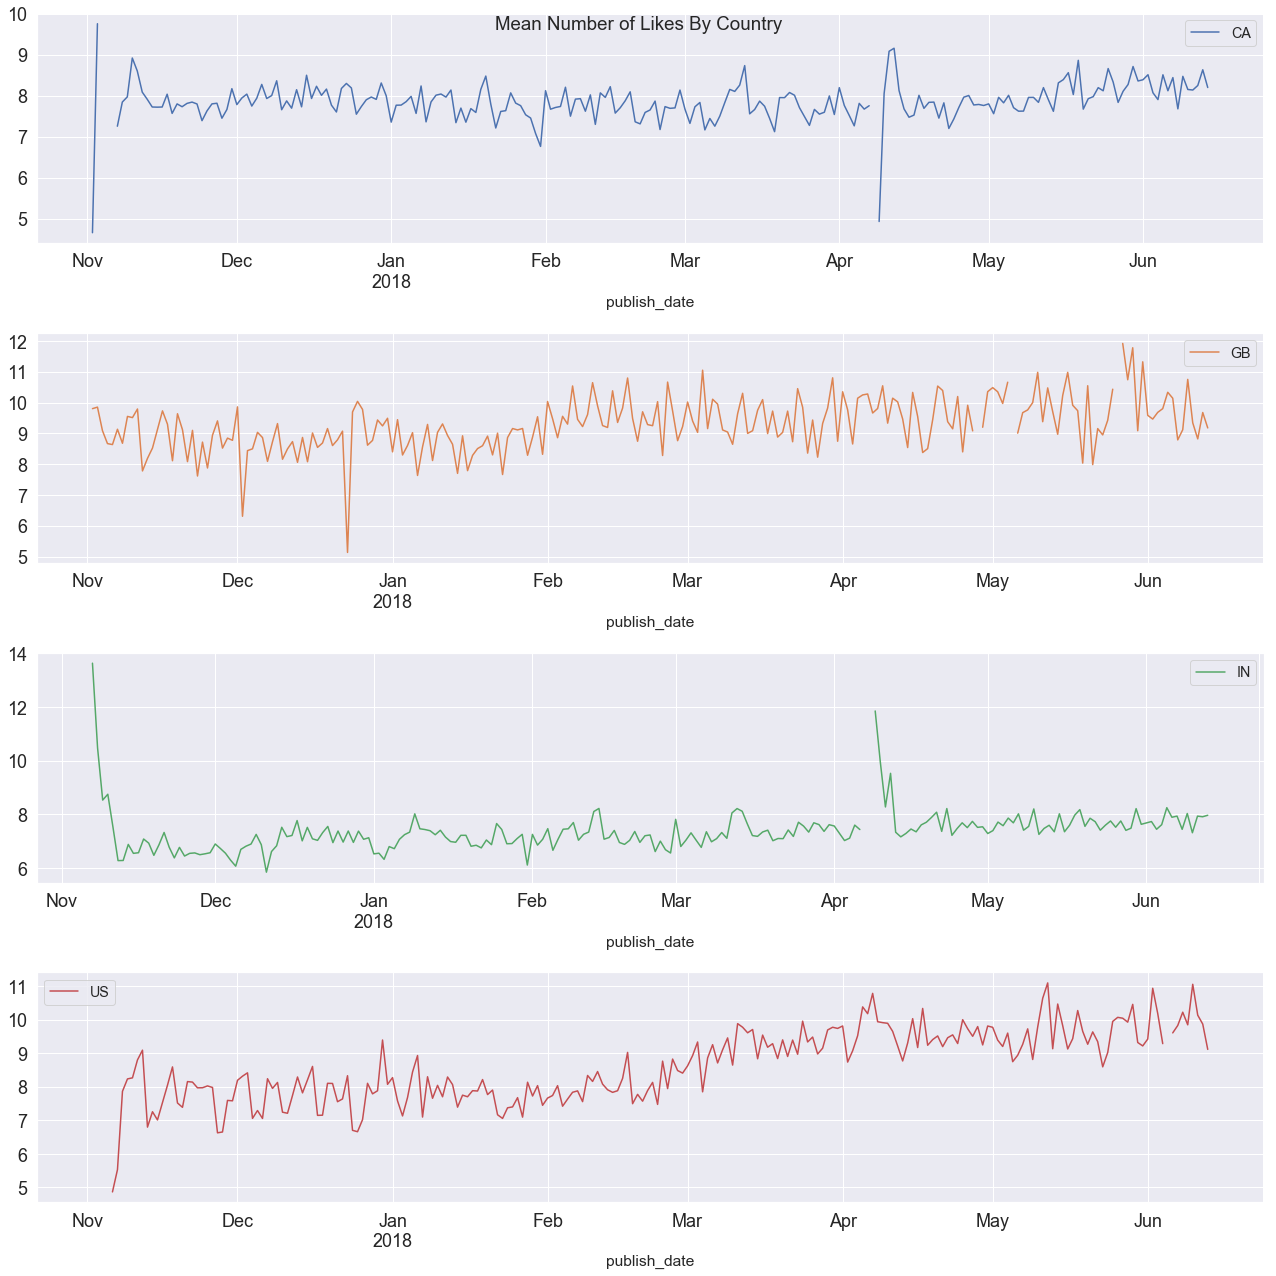

In [57]:
_ = tmp.pivot_table(index="publish_date",columns="country_code",values="likes").plot(subplots=True,figsize=(18,18),
                                                                                   title="Mean Number of Likes By Country",
                                                                                   sharex=False,fontsize=18)
plt.tight_layout()

Do people post more videos on weekends or on weekdays

In [58]:
train["day_of_week"]=train["publish_date"].dt.dayofweek

In [61]:
train["day_of_week"].head()

0    1
1    3
2    0
3    2
4    3
Name: day_of_week, dtype: int64

In [62]:
n_videos_per_day_of_week = train["day_of_week"].value_counts().sort_index().reset_index()
n_videos_per_day_of_week.columns = ["day_of_week","num_videos"]

In [63]:
n_videos_per_day_of_week.head()

day_of_week  num_videos
0            0        3824
1            1        3876
2            2        3874
3            3        4045
4            4        4206

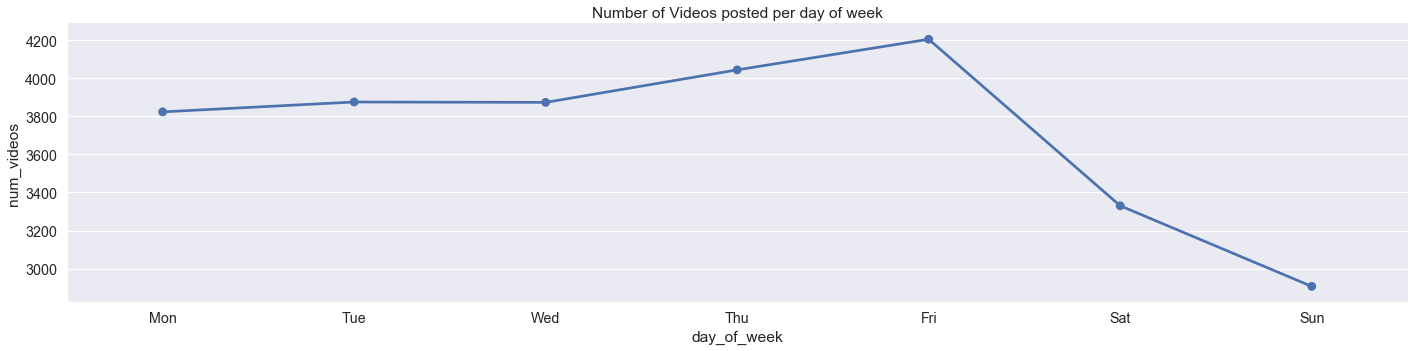

In [65]:
n_videos_per_day_of_week["day_of_week"]=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
_ = sns.catplot(x="day_of_week",y="num_videos",data=n_videos_per_day_of_week,kind="point",aspect=24/6)
_ = plt.title("Number of Videos posted per day of week")

<b>Our hypothesis was incorrect. More videos are posted on weekday than weekends.</b>

## Textual Data

In [66]:
text_cols = ["title","tags","description"]

WORD CLOUDS

In [70]:
from wordcloud import WordCloud,STOPWORDS

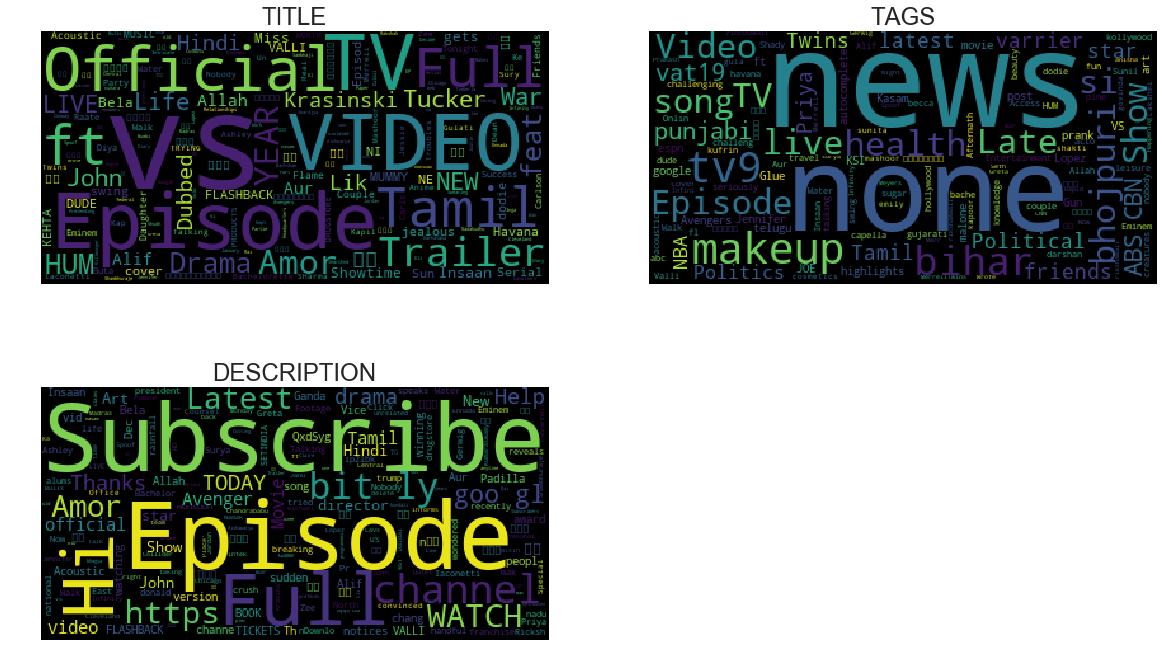

In [73]:
wc = WordCloud(stopwords = set(list(STOPWORDS)+["|"]),random_state=42)
fig,axes = plt.subplots(2,2,figsize=(20,12))
axes = [ax for axes_row in axes for ax in axes_row]

for i,c in enumerate(text_cols):
    op = wc.generate(str(train[c]))
    _ = axes[i].imshow(op)
    _ = axes[i].set_title(c.upper(),fontsize=24)
    _ = axes[i].axis("off")
_ = fig.delaxes(axes[3])

In [75]:
train["likes"].describe()

count    26061.000000
mean         7.739954
std          1.927899
min          0.000000
25%          6.527958
50%          7.840706
75%          9.054154
max         15.171369
Name: likes, dtype: float64

In [81]:
100*(train["likes"]>10).sum()/train.shape[0] #Percentage of likes above 10

10.694140669966616

In [82]:
def plot_wise(country_code = "IN"):
    country = train[train["country_code"] == country_code]
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    axes = [ax for axes_row in axes for ax in axes_row]
    
    for i, c in enumerate(text_cols):
        op = wc.generate(str(country[c]))
        _ = axes[i].imshow(op)
        _ = axes[i].set_title(c.upper(), fontsize=24)
        _ = axes[i].axis('off')
    fig.delaxes(axes[3])
    _ = plt.suptitle(f"Country Code: '{country_code}'", fontsize=30)

Top words used in highly liked videos in US

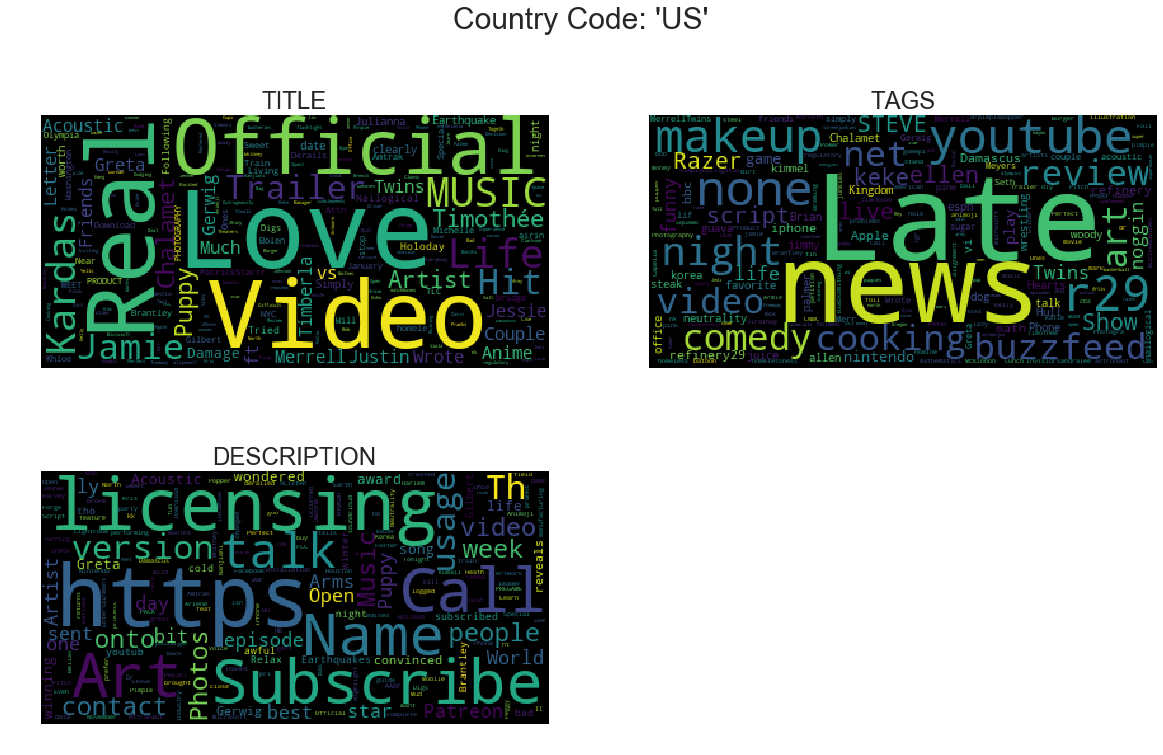

In [84]:
plot_wise("US")

Top words used in highly liked videos in IN

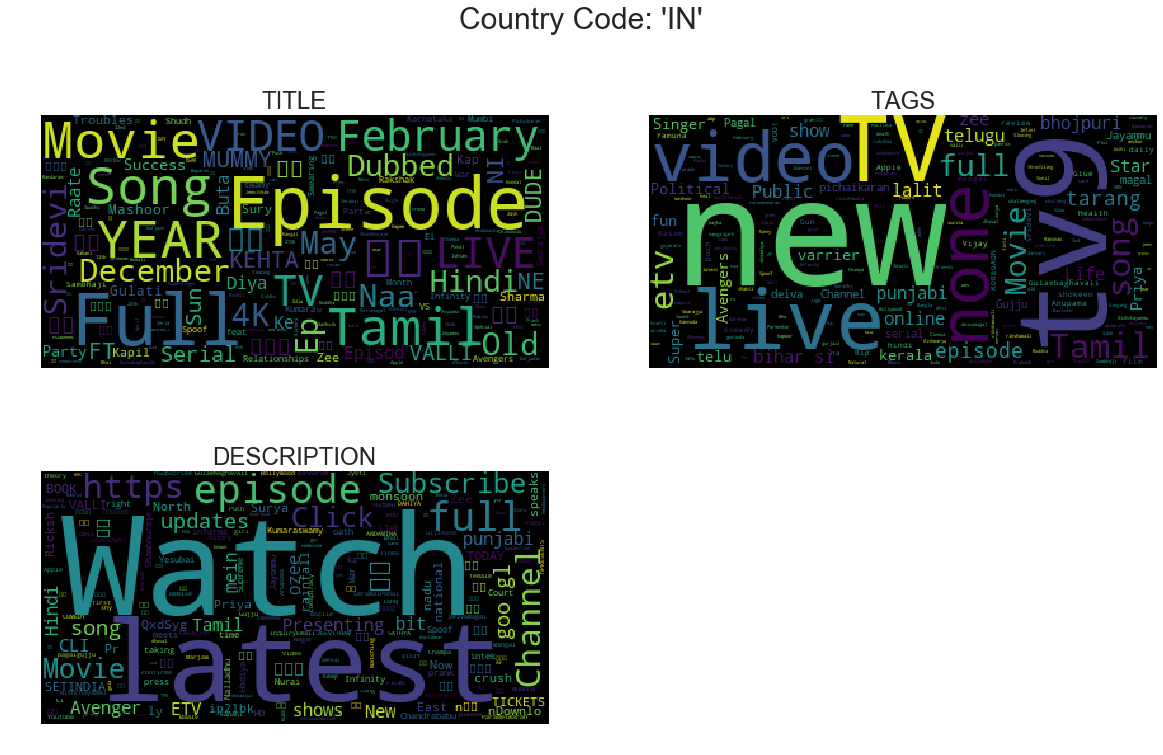

In [85]:
plot_wise("IN")

Top words used in highly liked videos in GB

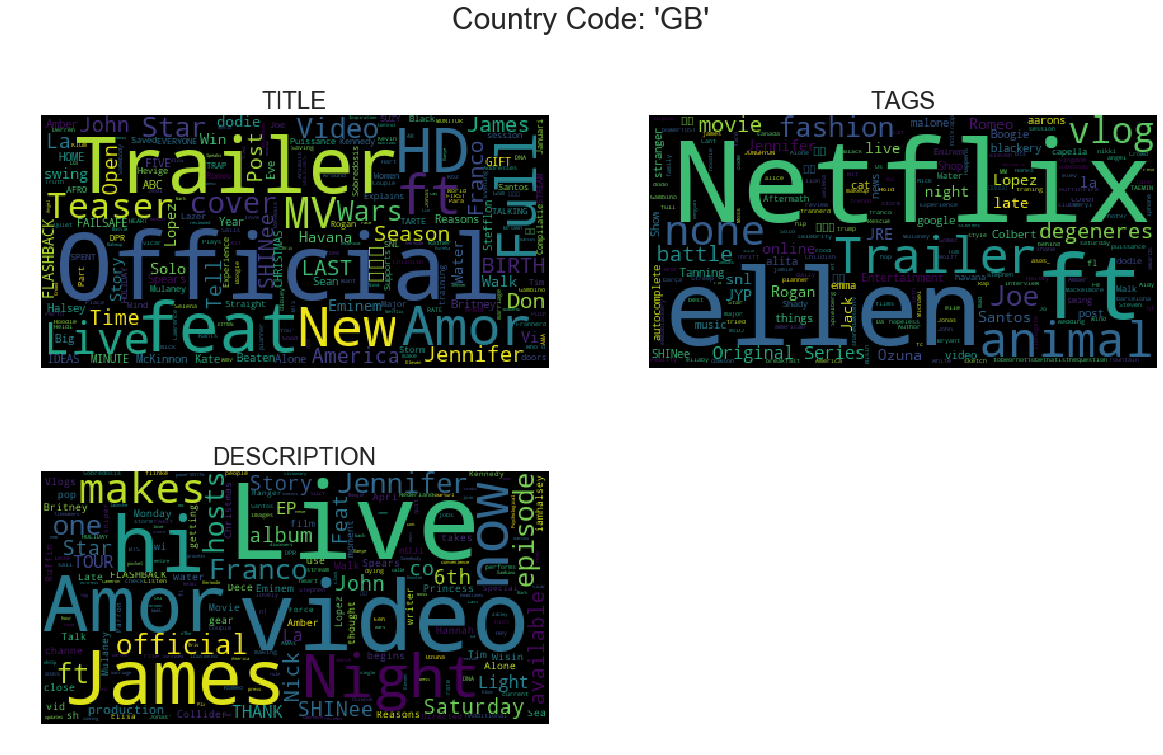

In [87]:
plot_wise("GB")

Top words used in highly liked videos in CA

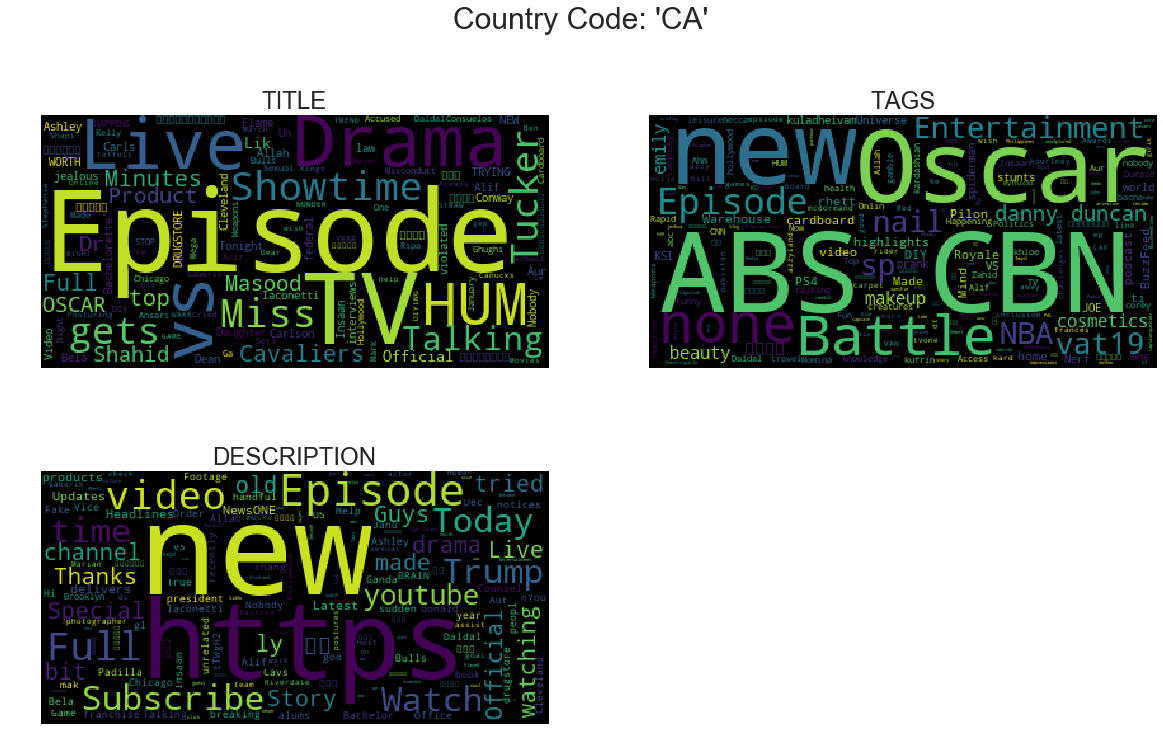

In [88]:
plot_wise("CA")

Do descrpitive videos get more likes

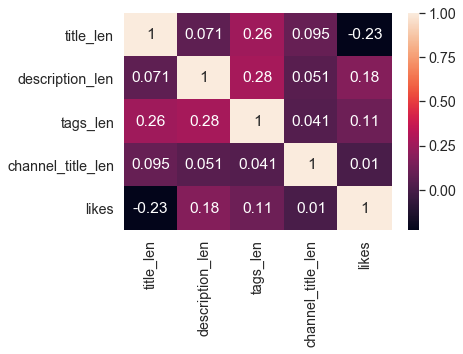

In [89]:
train["title_len"] = train["title"].apply(lambda x :len(x))
train['description_len'] = train['description'].apply(lambda x: len(x))
train['tags_len'] = train['tags'].apply(lambda x: len(x))
train['channel_title_len'] = train['channel_title'].apply(lambda x: len(x))
_  = sns.heatmap(train[['title_len', 'description_len', 'tags_len', 'channel_title_len', 'likes']].corr(), annot = True)

If title length increases, likes decreases(-0.23)<br>
If description length long, likes increases

In [90]:
train_1 = pd.read_csv("train.csv")
test_1 = pd.read_csv("test.csv")

In [91]:
train[num_cols + ['likes']] = train[num_cols + ['likes']].apply(lambda x: np.log1p(x))
test[num_cols] = test[num_cols].apply(lambda x: np.log1p(x))

## Model A. (Predicting all instances as mean)

In [92]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmsle(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(y_true, y_pred))

def av_metric(y_true, y_pred):
  return 1000 * np.sqrt(mean_squared_error(y_true, y_pred))

target = train[target]

In [94]:
preds_target = pd.Series([target.mean()] * len(train_1))

av_metric_score = av_metric(target, preds_target)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 255.16314092041353


In [95]:
preds_target

0        2.139083
1        2.139083
2        2.139083
3        2.139083
4        2.139083
5        2.139083
6        2.139083
7        2.139083
8        2.139083
9        2.139083
10       2.139083
11       2.139083
12       2.139083
13       2.139083
14       2.139083
15       2.139083
16       2.139083
17       2.139083
18       2.139083
19       2.139083
20       2.139083
21       2.139083
22       2.139083
23       2.139083
24       2.139083
25       2.139083
26       2.139083
27       2.139083
28       2.139083
29       2.139083
           ...   
26031    2.139083
26032    2.139083
26033    2.139083
26034    2.139083
26035    2.139083
26036    2.139083
26037    2.139083
26038    2.139083
26039    2.139083
26040    2.139083
26041    2.139083
26042    2.139083
26043    2.139083
26044    2.139083
26045    2.139083
26046    2.139083
26047    2.139083
26048    2.139083
26049    2.139083
26050    2.139083
26051    2.139083
26052    2.139083
26053    2.139083
26054    2.139083
26055    2